<a href="https://colab.research.google.com/github/lanhhv84/CVND_Exercises/blob/master/1_1_Image_Representation/3_Blue_Screen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Threshold, Blue Screen

### Colab Code

In [0]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/DS/CV/CVND_Exercises/1_1_Image_Representation'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -a '/content/drive/My Drive/DS/CV/CVND_Exercises/1_1_Image_Representation/.' /content

### Import resources

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [0]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


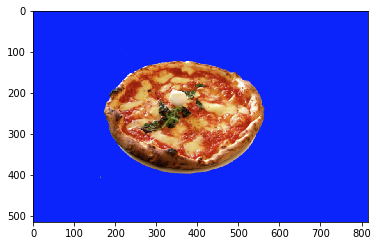

In [0]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)


### Define the color threshold

In [0]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,200])  # Zero red, green is ok
upper_blue = np.array([250,250,255]) # 


### Create a mask

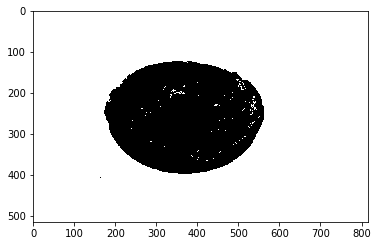

In [0]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

## Black pixels mean they are blocked out of the original image

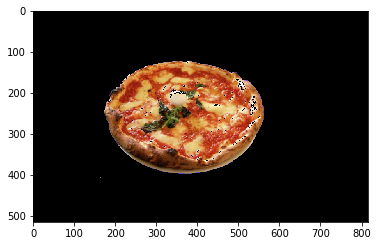

In [0]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

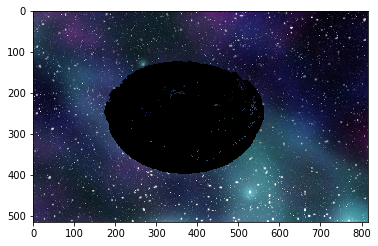

In [0]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

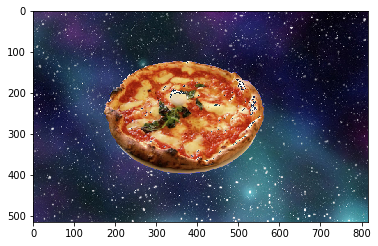

In [0]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)